### Assignment 4, Due Thursday, 9 May, 2024 @ 11:59PM

### Name: ---RAIN ALKAI----     ID: --202005090--------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

torch.set_printoptions(precision=4, sci_mode=False)

# Q1 Gradient Descent [25 pts]
1.1) [5pts] Write function `f(x)` that returns the value of the function $f(x) = 3x^2 + 12x$ \
Test the function by calling it with $x=3$ and print the result

In [14]:
# Write your code here
def f(x):
    return 3 * x**2 + 12 * x


result = f(3)
print("Result:", result)


Result: 63


1.2) [5pts] Plot the function $f(x)$ in the range $-10 \leq x \leq 10$


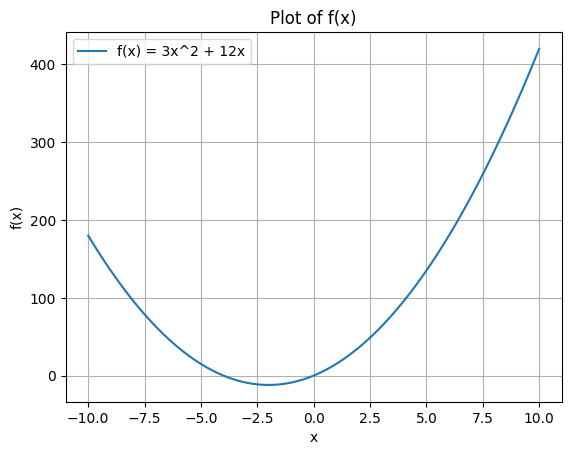

In [24]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 3 * x**2 + 12 * x


x_values = np.linspace(-10, 10, 100)

y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = 3x^2 + 12x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.legend()
plt.show()


1.3) [5pts] Write function `df(x)` that returns the value of the derivative of the function $f(x)\
Test the df function by calling it with $x=3$ and print the result

In [33]:
# Write your code here
def df(x):
    return 6 * x + 12


result = df(3)
print("Result:", result)


Result: 30


1.4) [10pts] Write a gradient_descent function that finds the minimum for the function $f(x)$.
The function should take the following arguments:
- `x` : initial guess
- `learning_rate` : learning rate with default value of 0.1
- `n_iters` : number of iterations with default value of 100

Test the method by calling it with $x=10$ and print the result

In [41]:
# Write your code here
def f(x):
    return 3 * x**2 + 12 * x

def df(x):
    return 6 * x + 12

def gradient_descent(x, learning_rate=0.1, n_iters=100):
    for _ in range(n_iters):
        gradient = df(x)
        x = x - learning_rate * gradient
    return x

x_initial = 10
minimum_x = gradient_descent(x_initial)
minimum_f = f(minimum_x)
print("Minimum x:", minimum_x)
print("Minimum f(x):", minimum_f)


Minimum x: -2.0
Minimum f(x): -12.0


# Q2 PyTorch autograd [25 pts]
2.1) [10pts] Reimplement df(x) for getting the gradient of f(x) (done in Q1.3) using PyTorch autograd \
Test the function by calling it with $x=3.0$ and print the result

In [48]:
import torch

def f(x):
    return 3 * x**2 + 12 * x

def df(x):
    x_tensor = torch.tensor(float(x), requires_grad=True) 
    result = f(x_tensor)
    result.backward()
    gradient = x_tensor.grad.item()
    return gradient


result = df(3)
print("Result:", result)



Result: 30.0


3.2) [15pts] Reimplement gradient_descent function (done in Q1.4) using PyTorch autograd \
Test the function by calling it with $x=10.0$ and print the result

In [54]:
# Write your code here
import torch

def f(x):
    return 3 * x**2 + 12 * x

def gradient_descent(x, learning_rate=0.1, n_iters=100):
    x_tensor = torch.tensor(float(x), requires_grad=True)
    
    for _ in range(n_iters):
        result = f(x_tensor)
        result.backward()
        gradient = x_tensor.grad.item()
        

        with torch.no_grad():
            x_tensor -= learning_rate * gradient
        
        x_tensor.grad.zero_()
    
    return x_tensor, f(x_tensor)


minimum_x, minimum_f = gradient_descent(10)
print("x_min =", minimum_x, "f(x_min) =", minimum_f)


x_min = tensor(-2., requires_grad=True) f(x_min) = tensor(-12., grad_fn=<AddBackward0>)


# Q3 Train a NN using IRIS dataset (50 pts)

In [59]:
# Import the iris dataset from sklearn
iris = load_iris()
X = iris['data']
y = iris['target']
y_class = iris['target_names']
feature_names = iris['feature_names']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Number of features: ", X.shape[1])
print("Number of classes: ", len(y_class))
print("Length of train dataset: ", X_train.shape[0])
print("Length of test dataset: ", X_test.shape[0])


X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

Number of features:  4
Number of classes:  3
Length of train dataset:  120
Length of test dataset:  30


3.1) [20pts] Create a neural network model with the following architecture:
- Input layer
- Hidden layer with 64 units and ReLU activation
- Hidden layer with 32 units and ReLU activation
- Output layer with 3 units and softmax activation

In [63]:
# Write your code here
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

input_size = 10
hidden_size1 = 64
hidden_size2 = 32
output_size = 3


model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)


print(model)


NeuralNetwork(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


3.2) [20pts] Train the model for 100 epochs and print the training loss every 10 iteration during the training \
- Use the Adam optimizer, CrossEntropyLoss function and a Learning Rate of 0.01

In [79]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Import iris dataset from sklearn
iris = load_iris()
X = iris['data']
y = iris['target']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

# Define the dimensions
input_size = X_train.shape[1]
output_size = len(set(y))

# Instantiate the existing neural network model
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  
    outputs = model(X_train)  
    loss = criterion(outputs, y_train) 
    loss.backward()  
    optimizer.step()  

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 0.7508
Epoch [20/100], Loss: 0.6066
Epoch [30/100], Loss: 0.5797
Epoch [40/100], Loss: 0.5729
Epoch [50/100], Loss: 0.5692
Epoch [60/100], Loss: 0.5666
Epoch [70/100], Loss: 0.5643
Epoch [80/100], Loss: 0.5625
Epoch [90/100], Loss: 0.5616
Epoch [100/100], Loss: 0.5611


3.3) [10pts] Test the model on the test set and print the following:
- Print the first 5 model predictions, predicted classes and actual classes
- Compute and print the accuracy of the model

In [83]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

rounded_outputs = torch.round(outputs * 10000) / 10000

print("First 5 model predictions (y_pred) : ", rounded_outputs[:5])
print("First 5 predicted classes : ", predicted[:5])
print("First 5 actual classes (y_test) : ", y_test_tensor[:5])

correct = (predicted == y_test_tensor).sum().item()
total = y_test_tensor.size(0)
accuracy = correct / total * 100

print("Accuracy:", accuracy)


First 5 model predictions (y_pred) :  tensor([[    0.0000,     1.0000,     0.0000],
        [    1.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     1.0000],
        [    0.0000,     0.9992,     0.0008],
        [    0.0000,     1.0000,     0.0000]])
First 5 predicted classes :  tensor([1, 0, 2, 1, 1])
First 5 actual classes (y_test) :  tensor([1, 0, 2, 1, 1])
Accuracy: 100.0
